# Example: Bivariate Copulas
This notebook explores the bivariate copulas.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copulas.bivariate import *
from copulas.bivariate import select_copula

Let's write a helper function which takes some data, generates synthetic data using different bivariate copulas, and the plots 2d histograms for all of them.

In [2]:
size = 2000

def generate_plots(data):
    plt.figure(figsize=(20,4))

    plt.subplot(1, 4, 1)
    plt.hist2d(data[:,0], data[:,1], density=True, vmin=0, vmax=1)
    plt.colorbar()
    plt.title("Real")

    plt.subplot(1, 4, 2)
    try:
        copula = Clayton()
        copula.fit(data)
        synthetic = copula.sample(len(data))
        plt.hist2d(synthetic[:,0], synthetic[:,1], density=True, vmin=0, vmax=1)
        plt.colorbar();
        plt.title("Clayton")
    except:
        print("Skipping Clayton...")

    plt.subplot(1, 4, 3)
    try:
        copula = Gumbel()
        copula.fit(data)
        synthetic = copula.sample(len(data))
        plt.hist2d(synthetic[:,0], synthetic[:,1], density=True, vmin=0, vmax=1)
        plt.colorbar();
        plt.title("Gumbel")
    except:
        print("Skipping Gumbel...")


    plt.subplot(1, 4, 4)
    try:
        copula = Frank()
        copula.fit(data)
        synthetic = copula.sample(len(data))
        plt.hist2d(synthetic[:,0], synthetic[:,1], density=True, vmin=0, vmax=1)
        plt.colorbar();
        plt.title("Frank")
    except:
        print("Skipping Frank...")

    plt.show()

Next, we can create a helper function which transforms an arbitrary distribution into a uniform distribution using the emperical CDF.

In [3]:
def transform_to_uniform(x):
    tmp = x.argsort()
    cdf = np.zeros(tmp.shape)
    cdf[tmp] = np.arange(len(x))
    return cdf / len(x)

We can then generate some arbitrary distributions, transform the marginals into uniform distributions, and see what they look like when modeled using bivariate copulas.

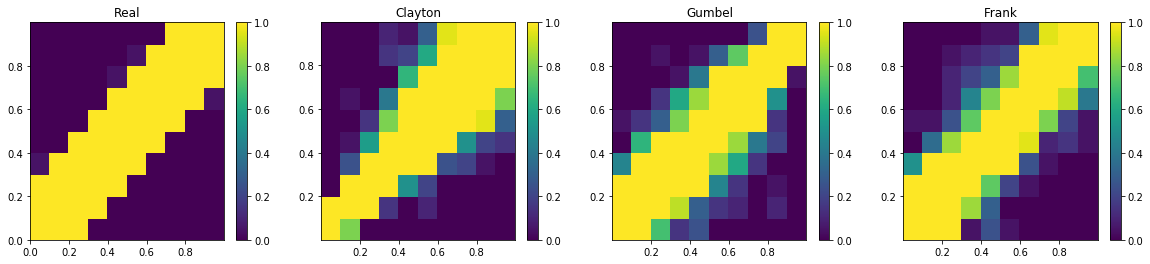

In [4]:
x = np.random.random(size=size)
y = np.random.random(size=size)*0.3 + x*0.7
data = np.stack([transform_to_uniform(x), transform_to_uniform(y)], axis=1)
generate_plots(data)

This next example demonstrates a joint distribution which is best modeled using a Clayton copula.

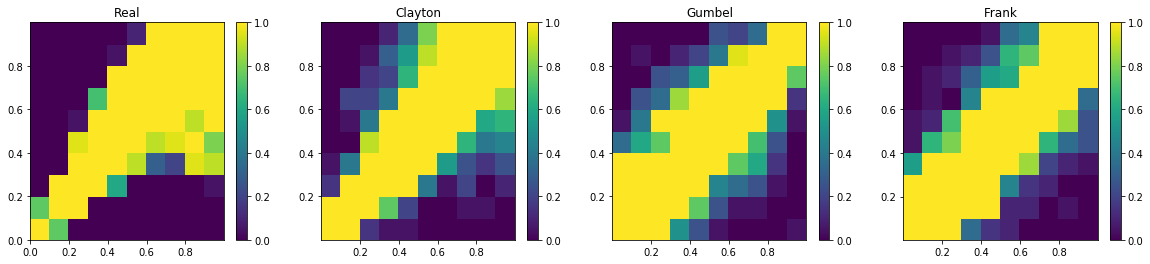

In [5]:
x = np.random.random(size=size)
y = np.random.random(size=size)*(0.7*x) + x*(1.0-0.7*x)
data = np.stack([transform_to_uniform(x), transform_to_uniform(y)], axis=1)
generate_plots(data)

Visually, we can clearly see that the Clayton copula is the best fit. We can confirm that the built in bivariate copula selection function agrees:

In [6]:
type(select_copula(data)).__name__

'Clayton'

This final example demonstrates a scenario where the correlation is negative. Only the Frank copula handles this case without require an explicit rotation.

Skipping Clayton...
Skipping Gumbel...


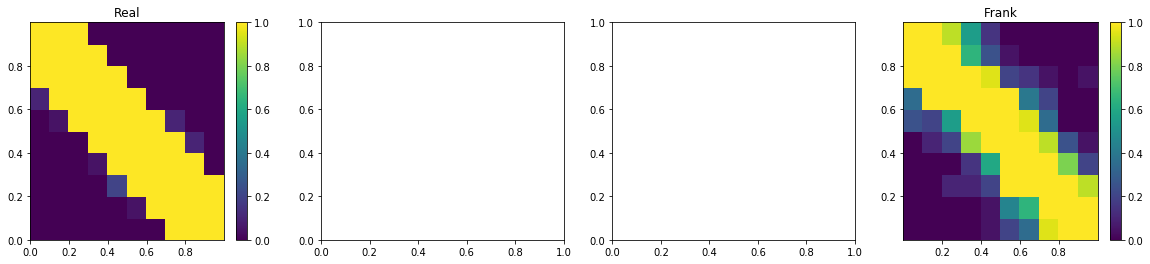

In [7]:
x = np.random.random(size=size)
y = 1.0-(np.random.random(size=size)*0.3 + x*0.7)
data = np.stack([transform_to_uniform(x), transform_to_uniform(y)], axis=1)
generate_plots(data)